In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import random

l1 = 20
l2 = 12
l3 = 7

In [2]:
def plot_coordinates(csv_file):
    df = pd.read_csv(csv_file)

    df["Time"] = range(len(df))

    fig, axes = plt.subplots(2, 1, figsize=(13, 7))

    axes[0].plot(df["Time"], df["x_scaled"], label="x_scaled", color='green')
    axes[0].set_xlabel("Time", weight='bold')
    axes[0].set_ylabel("X Coordinate", weight='bold')
    axes[0].set_title("X Coordinate vs Time", weight='bold')
    axes[0].legend(prop={'weight': 'bold'})
    axes[0].grid(True)

    axes[1].plot(df["Time"], df["y_scaled"], label="y_scaled", color='purple')
    axes[1].set_xlabel("Time", weight='bold')
    axes[1].set_ylabel("Y Coordinate", weight='bold')
    axes[1].set_title("Y Coordinate vs Time", weight='bold')
    axes[1].legend(prop={'weight': 'bold'})
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [3]:
def plot_subset_coordinates(csv_file, limit = 100):
    df = pd.read_csv(csv_file, nrows=limit)

    df["Time"] = range(len(df))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].plot(df["Time"], df["x_scaled"], label="x_scaled", color='green')
    axes[0].set_xlabel("Time", weight='bold')
    axes[0].set_ylabel("X Coordinate", weight='bold')
    axes[0].set_title("X Coordinate vs Time", weight='bold')
    axes[0].legend(prop={'weight': 'bold'})
    axes[0].grid(True)

    axes[1].plot(df["Time"], df["y_scaled"], label="y_scaled", color='purple')
    axes[1].set_xlabel("Time", weight='bold')
    axes[1].set_ylabel("Y Coordinate", weight='bold')
    axes[1].set_title("Y Coordinate vs Time", weight='bold')
    axes[1].legend(prop={'weight': 'bold'})
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [4]:
def displayWorkSpace(csv_file):
    data = pd.read_csv(csv_file)
    plt.scatter(data['x_scaled'], data['y_scaled'], color = 'gold')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.grid()

In [ ]:
def randomStepSizeData(num_samples=150000):
    data = []
    for _ in range(num_samples):
        q1 = round(random.uniform(0, m.pi), 2)
        q2 = round(random.uniform(-m.pi, 0), 2)
        q3 = round(random.uniform(-m.pi / 2, m.pi / 2))

        theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
        x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
        y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
        data.append([x_s, y_s, theta_o, q1, q2, q3])

    return data

def fixedStepSizeData(num_samples=150000):
    data = []

    individual_count = m.ceil(num_samples ** (1/3))

    q1_values = np.linspace(0, m.pi, individual_count)
    q2_values = np.linspace(-m.pi, 0, individual_count)
    q3_values = np.linspace(-m.pi / 2, m.pi / 2, individual_count)

    for q1 in q1_values:
        for q2 in q2_values:
            for q3 in q3_values:
                theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
                x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
                y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
                data.append([x_s, y_s, theta_o, q1, q2, q3])
                if len(data) >= num_samples:
                    return data
    return data

def sinusoidalTrajectoryData(num_samples=150000):
    data = []
    individual_count = m.ceil(num_samples ** (1 / 3))

    q1_base = np.linspace(0, m.pi, individual_count)
    q2_base = np.linspace(-m.pi, 0, individual_count)
    q3_base = np.linspace(-m.pi / 2, m.pi / 2, individual_count)

    for i, q1 in enumerate(q1_base):
        mod_q2 = [q2 + 0.2 * m.sin(3 * q1 + j) for j, q2 in enumerate(q2_base)]
        for j, q2 in enumerate(mod_q2):
            mod_q3 = [q3 + 0.2 * m.sin(5 * q2 + k) for k, q3 in enumerate(q3_base)]
            for q3 in mod_q3:
                theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
                x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
                y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
                data.append([x_s, y_s, theta_o, q1, q2, q3])
                if len(data) >= num_samples:
                    return data
    return data

In [ ]:
def randomStepSizeDataset(target_samples=150000):

    data = randomStepSizeData(num_samples=target_samples)

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])

    df.to_csv('Three Link_Random Step Size.csv', index = False)

randomStepSizeDataset()

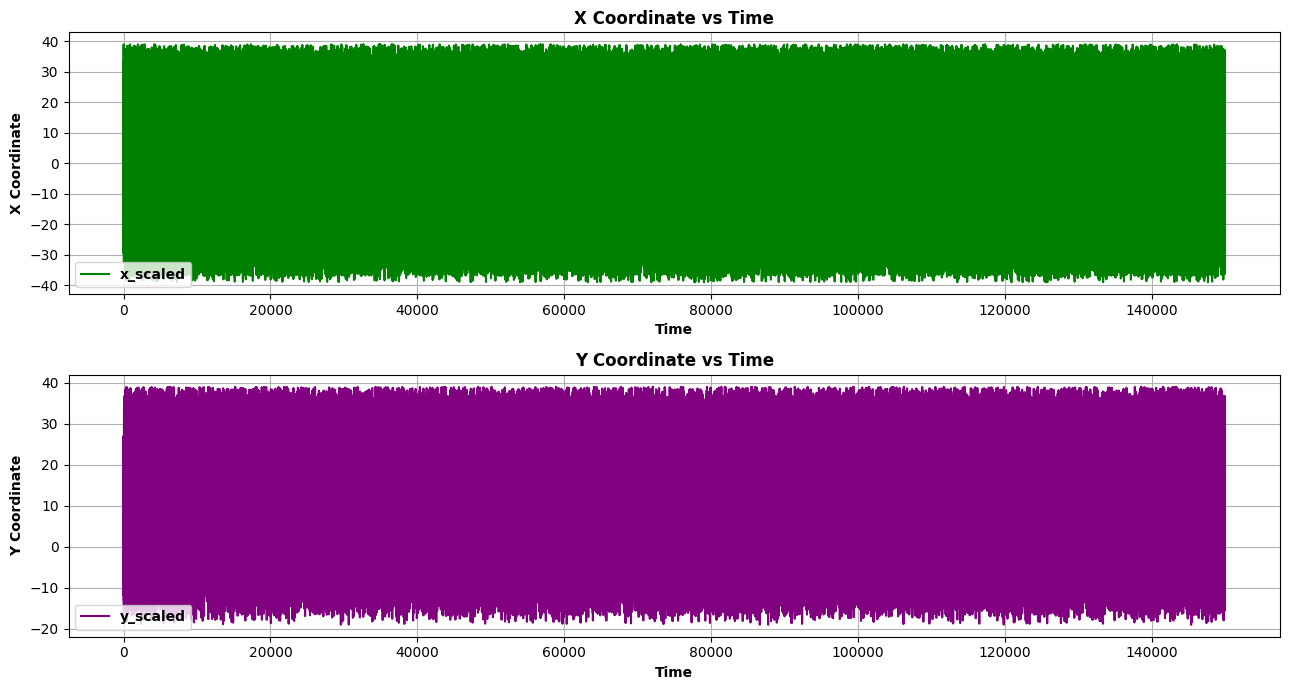

In [7]:
plot_coordinates("Three Link_Random Step Size.csv")

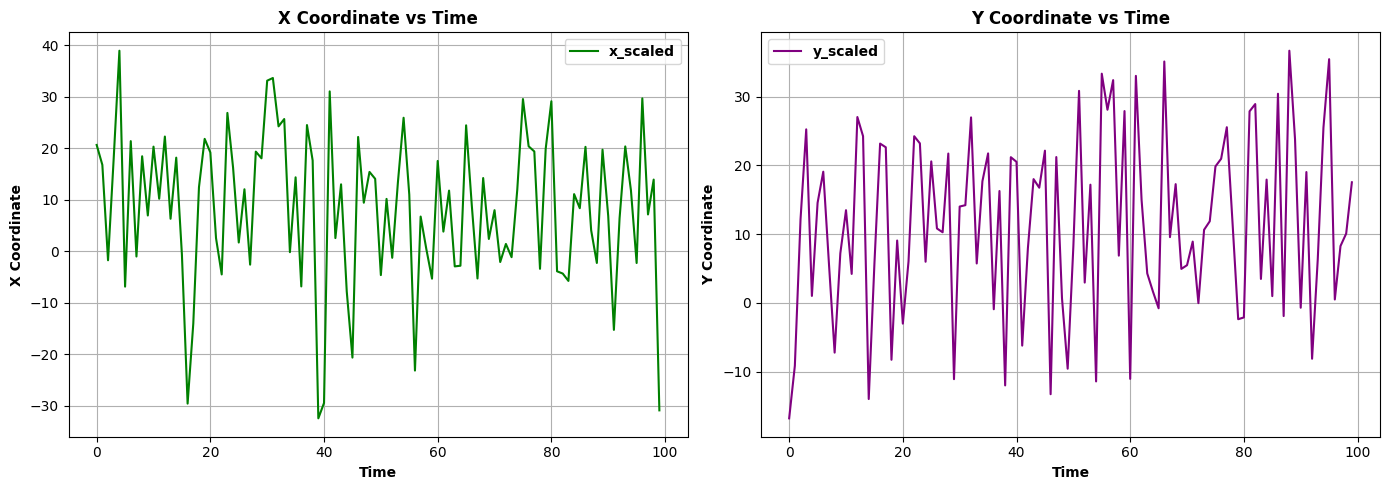

In [8]:
plot_subset_coordinates("Three Link_Random Step Size.csv")

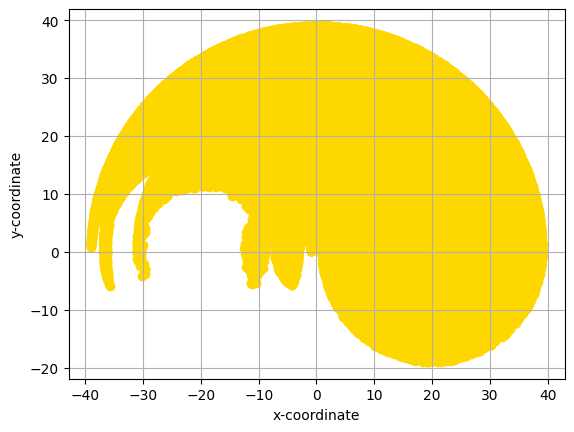

In [9]:
displayWorkSpace("Three Link_Random Step Size.csv")

In [ ]:
def fixedStepSizeDataset(target_samples=150000):

    data = fixedStepSizeData(num_samples=target_samples)

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_Fixed Step Size.csv', index=False)

fixedStepSizeDataset()

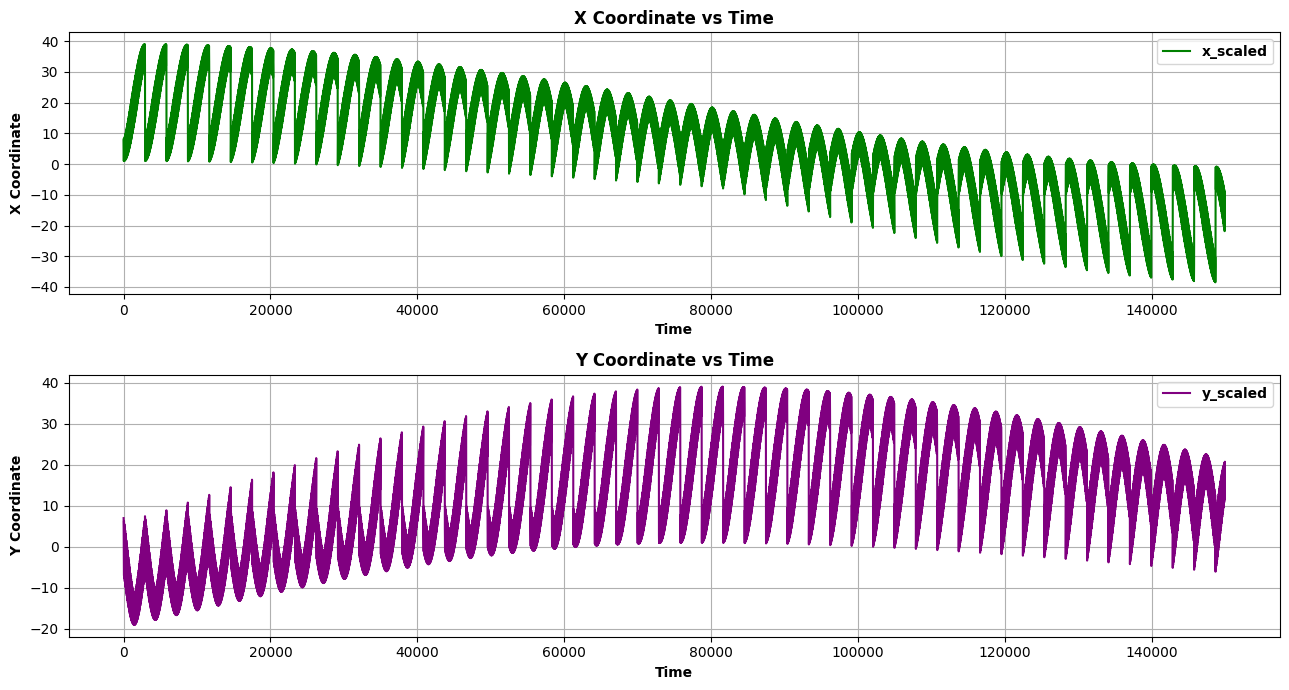

In [11]:
plot_coordinates("Three Link_Fixed Step Size.csv")

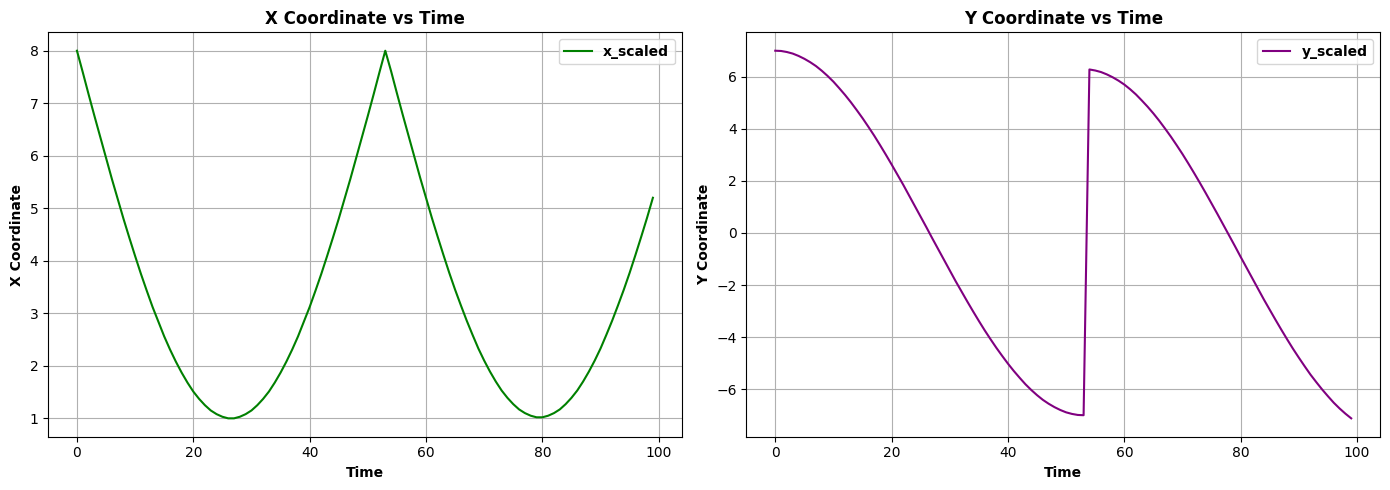

In [12]:
plot_subset_coordinates("Three Link_Fixed Step Size.csv")

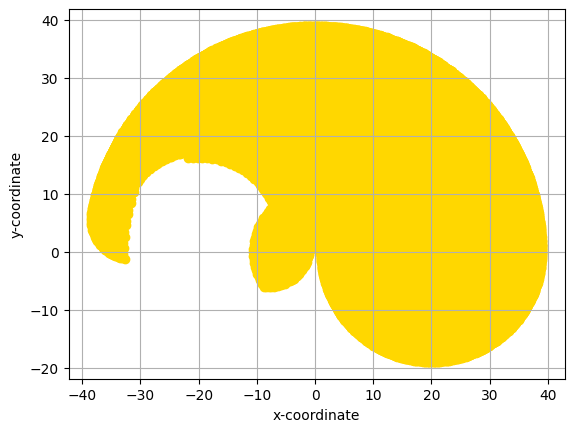

In [13]:
displayWorkSpace("Three Link_Fixed Step Size.csv")

In [14]:
def sinusoidalTrajectoryDataset(target_samples=150000):
    data = sinusoidalTrajectoryData(num_samples=target_samples)

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_Sinusoidal Trajectory.csv', index=False)

sinusoidalTrajectoryDataset()

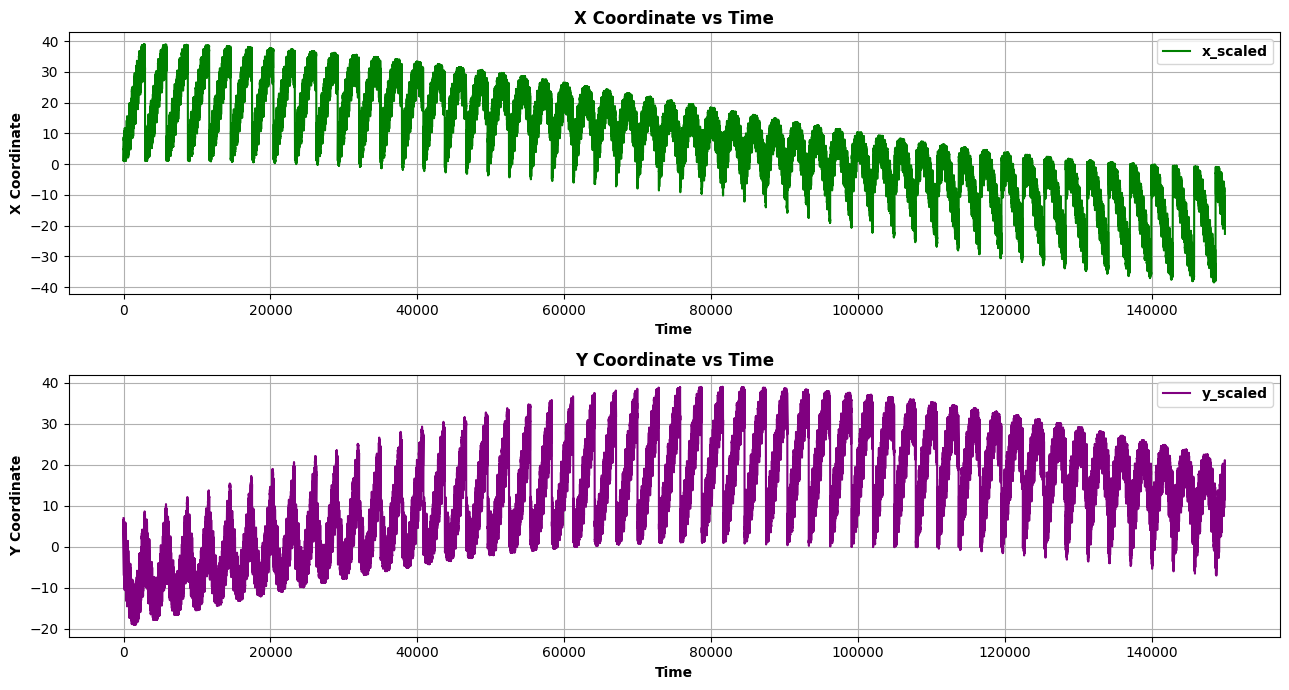

In [15]:
plot_coordinates("Three Link_Sinusoidal Trajectory.csv")

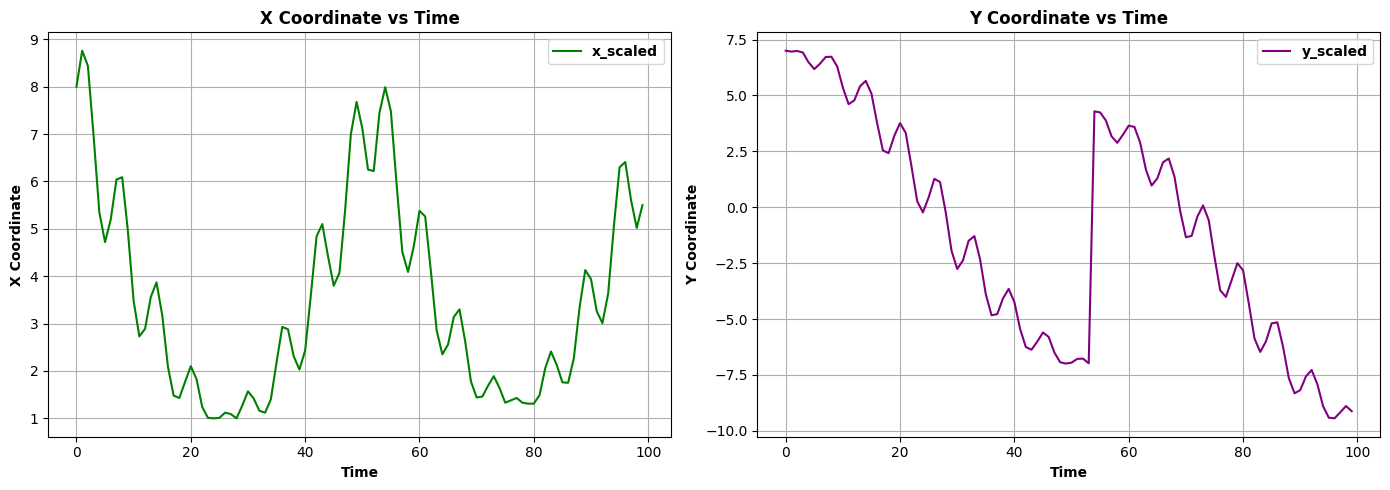

In [16]:
plot_subset_coordinates("Three Link_Sinusoidal Trajectory.csv")

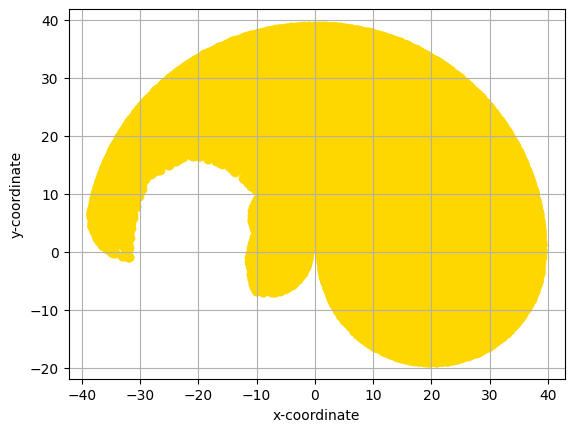

In [17]:
displayWorkSpace("Three Link_Sinusoidal Trajectory.csv")

In [18]:
def generateRandomFixedDataset(target_samples=150000):
    data_random = randomStepSizeData(num_samples=target_samples // 2)
    data_fixed = fixedStepSizeData(num_samples=target_samples // 2)
    combined_data = data_random + data_fixed

    df = pd.DataFrame(combined_data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_RandomFixed.csv', index=False)

generateRandomFixedDataset()

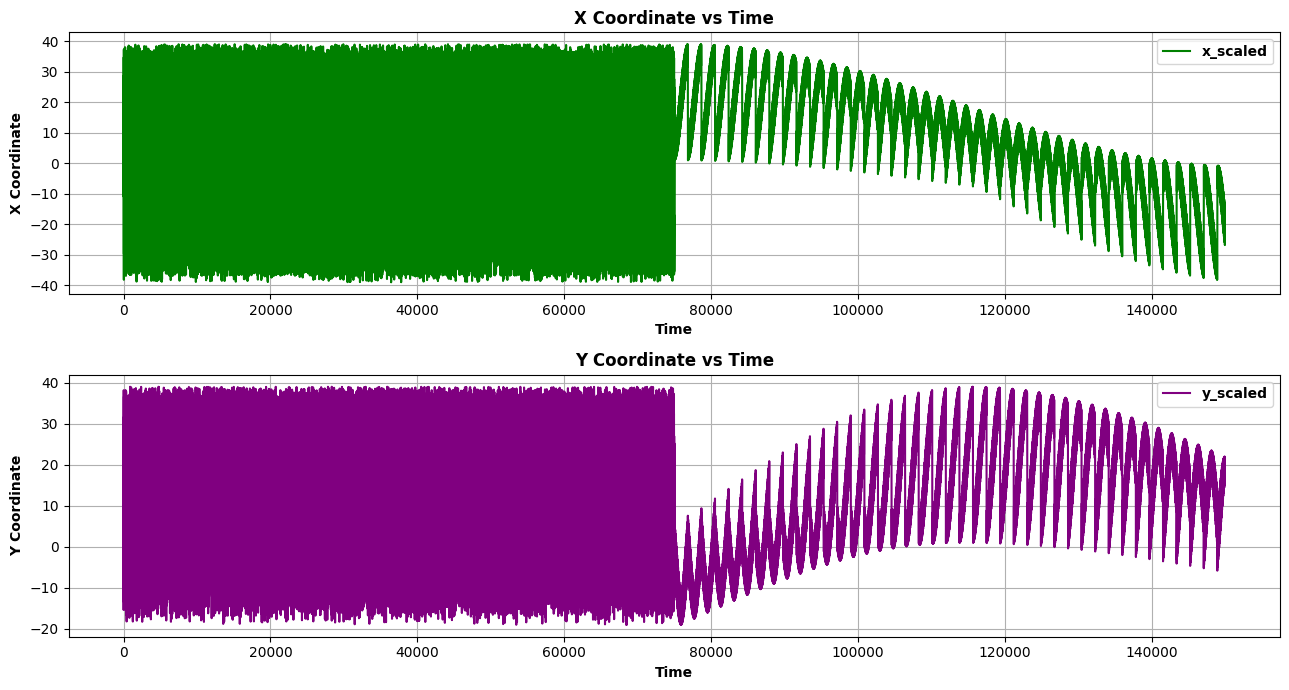

In [19]:
plot_coordinates('Three Link_RandomFixed.csv')

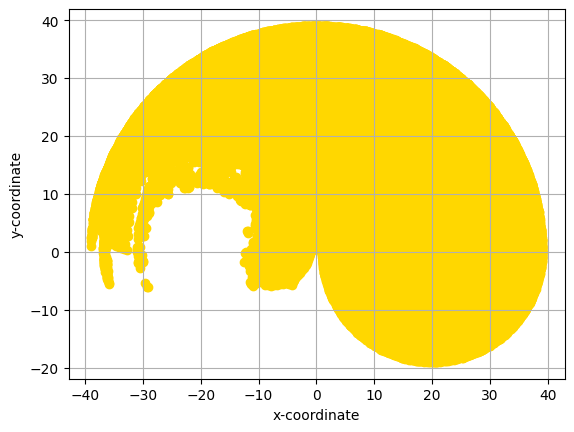

In [20]:
displayWorkSpace("Three Link_RandomFixed.csv")

In [21]:
def generateFixedSinusoidalDataset(target_samples=150000):
    data_fixed = fixedStepSizeData(num_samples=target_samples // 2)
    data_sinusoidal = sinusoidalTrajectoryData(num_samples=target_samples // 2)
    combined_data = data_fixed + data_sinusoidal

    df = pd.DataFrame(combined_data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_FixedSinusoidal.csv', index=False)

generateFixedSinusoidalDataset()

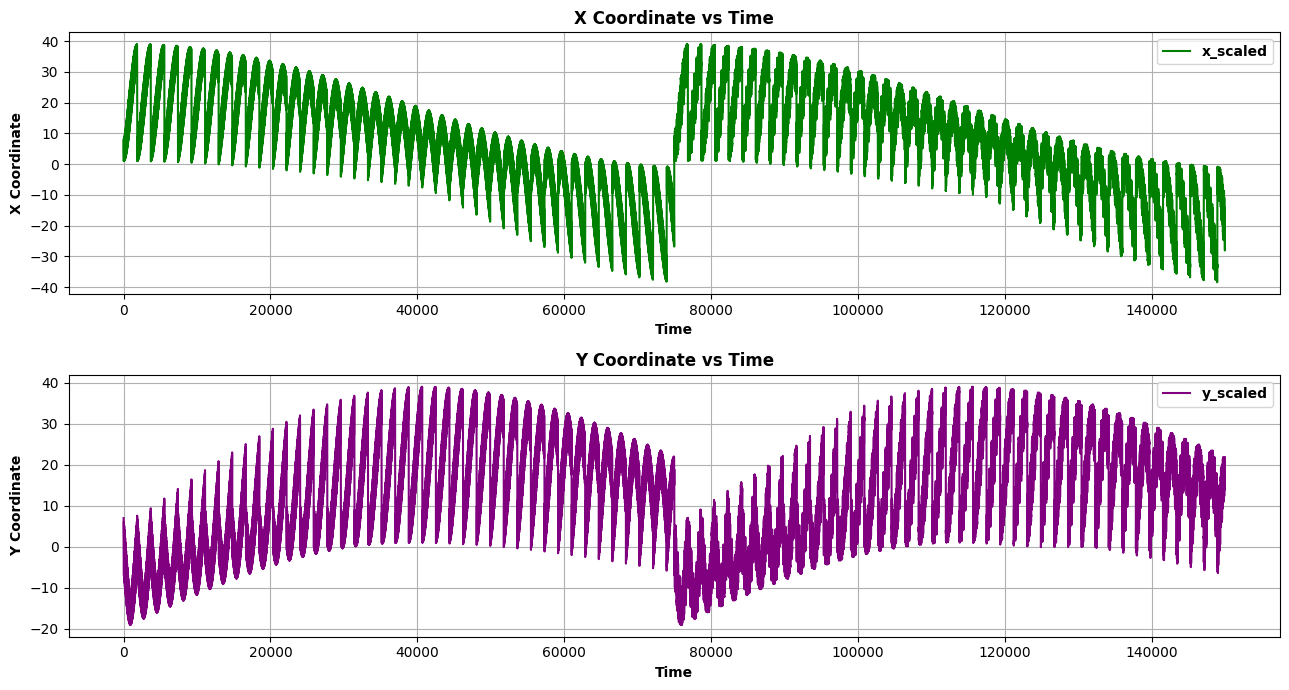

In [22]:
plot_coordinates('Three Link_FixedSinusoidal.csv')

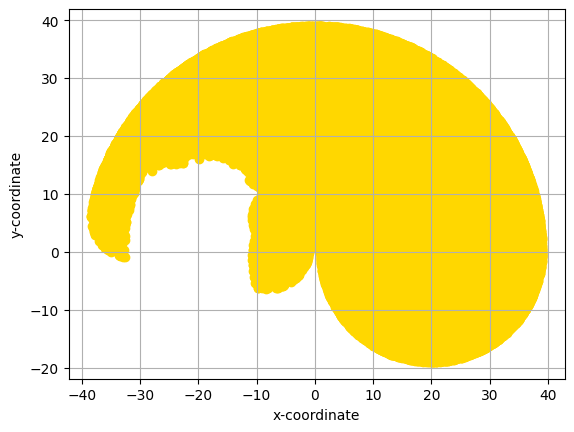

In [23]:
displayWorkSpace("Three Link_FixedSinusoidal.csv")

In [24]:
def generateSinusoidalRandomDataset(target_samples=150000):
    data_sinusoidal = sinusoidalTrajectoryData(num_samples=target_samples // 2)
    data_random = randomStepSizeData(num_samples=target_samples // 2)
    combined_data = data_sinusoidal + data_random

    df = pd.DataFrame(combined_data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_SinusoidalRandom.csv', index=False)

generateSinusoidalRandomDataset()

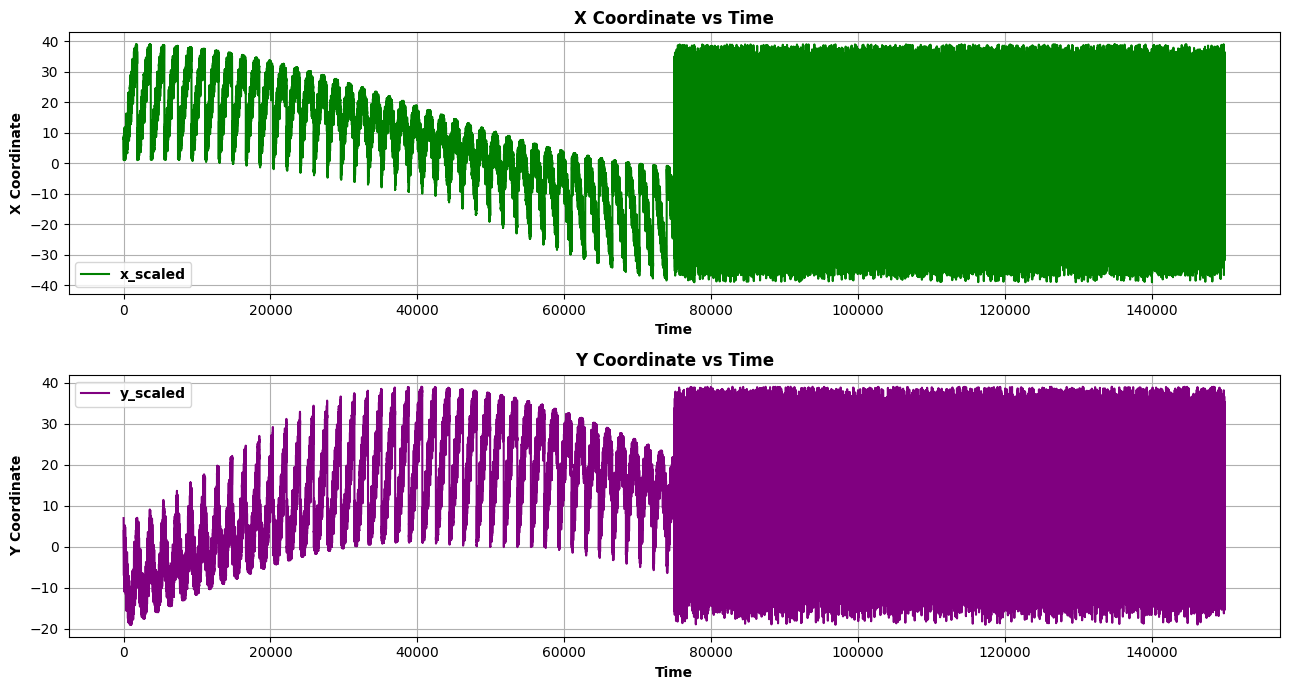

In [25]:
plot_coordinates('Three Link_SinusoidalRandom.csv')

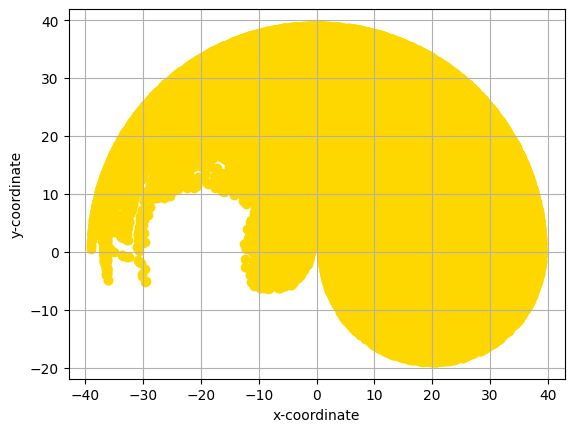

In [26]:
displayWorkSpace("Three Link_SinusoidalRandom.csv")

In [27]:
def generateRandomFixedSinusoidalDataset(target_samples=150000):
    data_random = randomStepSizeData(num_samples=target_samples // 3)
    data_fixed = fixedStepSizeData(num_samples=target_samples // 3)
    data_sinusoidal = sinusoidalTrajectoryData(num_samples=target_samples // 3)
    combined_data = data_random + data_fixed + data_sinusoidal

    df = pd.DataFrame(combined_data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_RandomFixedSinusoidal.csv', index=False)

generateRandomFixedSinusoidalDataset()

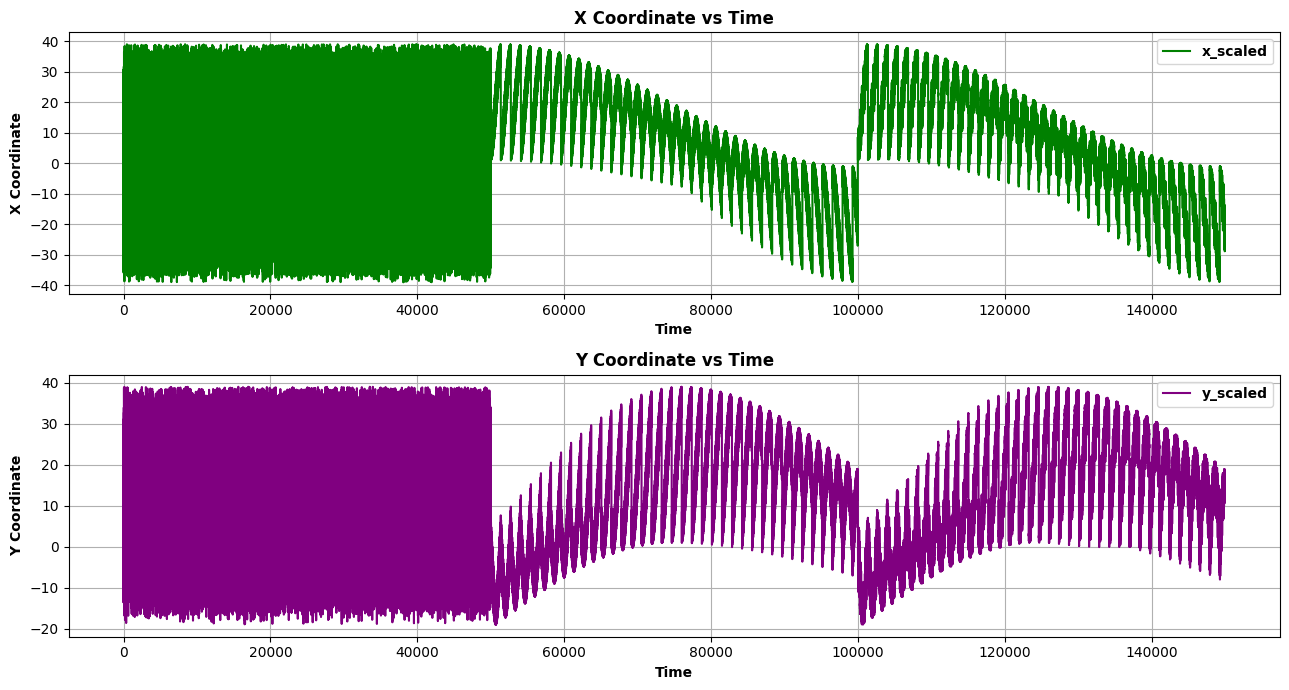

In [28]:
plot_coordinates('Three Link_RandomFixedSinusoidal.csv')

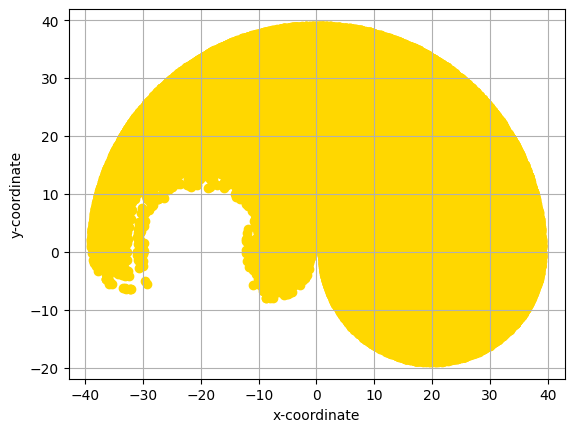

In [29]:
displayWorkSpace("Three Link_RandomFixedSinusoidal.csv")